In [2]:
%pylab inline
from astropy.io import fits
import astropy.units as u
import pickle as pickle
import os as os
import pandas as pd

from spec_utils import read_irs

from spectools_ir.utils import extract_hitran_data, spec_convol, make_rotation_diagram, get_molmass
from spectools_ir.utils import compute_thermal_velocity, sigma_to_fwhm, fwhm_to_sigma, wn_to_k, spec_convol_R
from spectools_ir.utils import get_miri_mrs_resolution, get_miri_mrs_wavelengths, make_miri_mrs_figure

from spectools_ir.flux_calculator import calc_fluxes, make_lineshape

from spectools_ir.slabspec import make_spec

from spectools_ir.slab_fitter import Config, LineData,Retrieval
from spectools_ir.slab_fitter import corner_plot, trace_plot, find_best_fit, compute_model_fluxes
from spectools_ir.slab_fitter import calc_solid_angle, calc_radius
from spectools_ir.slab_fitter import read_data_from_file, get_samples

Populating the interactive namespace from numpy and matplotlib


# HT Lup, GW Lup, IM Lup, RU Lup, AS 205, DoAr 25, WaOph 6, AS 209, FZ Tau, TW Cha, VZ Cha, GQ Lup, IRAS 04385, GK Tau, CI Tau, RY Lup

## Upper limits for: HT Lup, GW Lup, IM Lup, DoAr 25, RY Lup

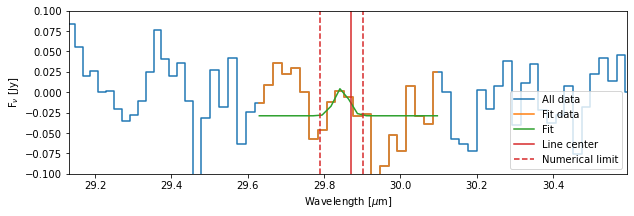

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,4.035440e-18,5.344957e-18,7.827707e-18,442.260656,854.057155,-46.590004,366.289172,-0.028847,0.013466


In [3]:
#HT Lup

irs=read_irs('HTLUP',dd='/Users/dougcobb/URSI_2022/REDUCED/',noerror=True)
wave_data = pd.DataFrame([29.85], columns=['wave'])
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.10, ymin=-0.1,amp=0.02)
#linefluxes.append(lineflux_data['lineflux'])

lineflux_data

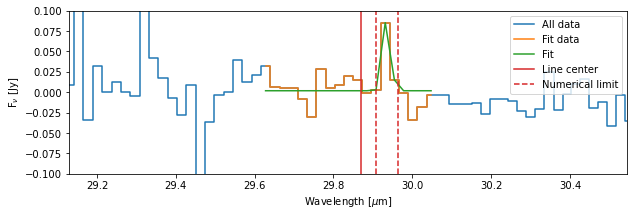

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,7.616102e-18,7.428323e-18,1.294869e-18,221.766113,303.657636,863.100185,193.199695,0.001869,0.004622


In [4]:
#GW Lup

irs=read_irs('GWLUP',dd='/Users/dougcobb/URSI_2022/REDUCED/',noerror=True)
wave_data = pd.DataFrame([29.85], columns=['wave'])
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.10, ymin=-0.1,amp=0.02)
#linefluxes.append(lineflux_data['lineflux'])

lineflux_data

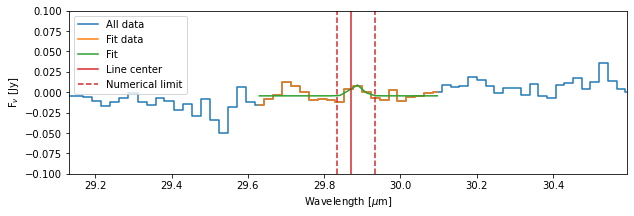

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,1.408070e-18,1.883011e-18,9.177431e-19,391.621206,248.80255,340.922236,120.382644,-0.004404,0.001759


In [5]:
#IM Lup

irs=read_irs('IMLUP',dd='/Users/dougcobb/URSI_2022/REDUCED/',noerror=True)
wave_data = pd.DataFrame([29.85, 17.22], columns=['wave']) #Water, Water
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.10, ymin=-0.1,amp=0.02)
#linefluxes.append(lineflux_data['lineflux'])

lineflux_data

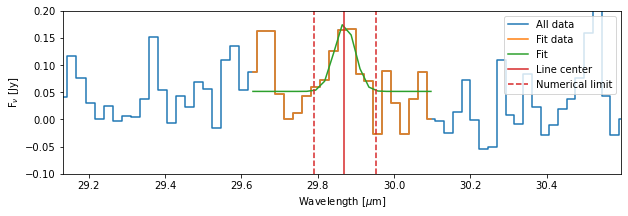

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,2.990551e-17,2.863730e-17,1.099496e-17,636.661178,287.13087,209.53646,113.665033,0.051567,0.013985


In [7]:
#RU Lup

irs=read_irs('RULUP',dd='/Users/dougcobb/URSI_2022/REDUCED/',noerror=True)
wave_data = pd.DataFrame([29.85], columns=['wave'])
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.20, ymin=-0.1,amp=0.02)
#linefluxes.append(lineflux_data['lineflux'])

lineflux_data

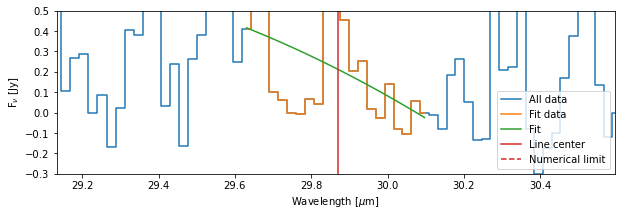

Is this fit okay? [y or n]n


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err


In [10]:
#AS 205

irs=read_irs('AS205_c2d',dd='/Users/dougcobb/URSI_2022/REDUCED/',noerror=True)
wave_data = pd.DataFrame([29.85], columns=['wave'])
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.50, ymin=-0.3,amp=0.02)
#linefluxes.append(lineflux_data['lineflux'])

lineflux_data

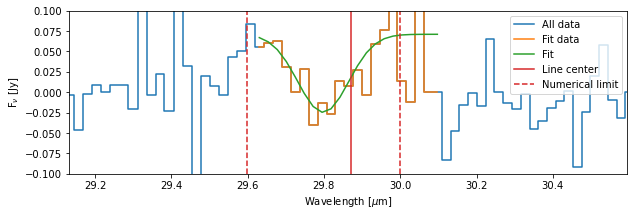

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,-3.747386e-17,5.406161e-17,3.813849e-17,1580.172163,1020.587266,-519.836291,330.211799,0.071096,0.029609


In [11]:
#DoAr 25

irs=read_irs('DOAR25',dd='/Users/dougcobb/URSI_2022/REDUCED/',noerror=True)
wave_data = pd.DataFrame([29.85], columns=['wave'])
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.10, ymin=-0.1,amp=0.02)
#linefluxes.append(lineflux_data['lineflux'])

lineflux_data

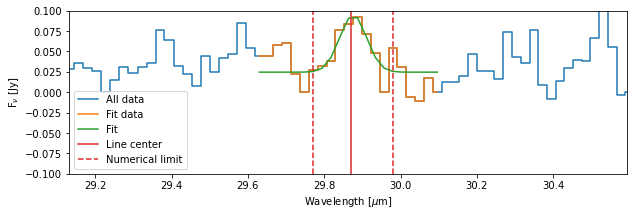

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,2.172940e-17,2.079889e-17,6.009586e-18,831.346146,253.818624,259.20179,97.860166,0.024672,0.006265


In [12]:
#WaOph 6

irs=read_irs('WAOPH6',dd='/Users/dougcobb/URSI_2022/REDUCED/',noerror=True)
wave_data = pd.DataFrame([29.85], columns=['wave'])
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.10, ymin=-0.1,amp=0.02)
#linefluxes.append(lineflux_data['lineflux'])

lineflux_data

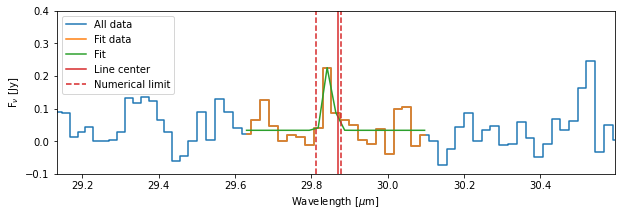

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,1.965583e-17,1.943532e-17,3.731440e-18,258.119504,176.759996,-38.72862,93.644375,0.033362,0.010636


In [15]:
#AS 209

irs=read_irs('V1121OPH',dd='/Users/dougcobb/URSI_2022/REDUCED/',noerror=True)
wave_data = pd.DataFrame([29.85], columns=['wave'])
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.40, ymin=-0.1,amp=0.02)
#linefluxes.append(lineflux_data['lineflux'])

lineflux_data

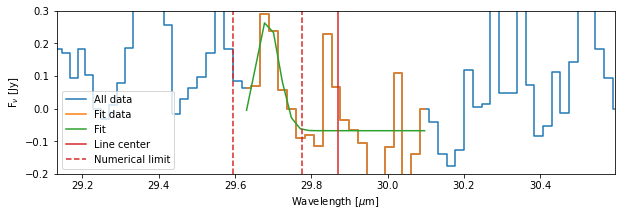

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,8.791559e-17,8.769086e-17,2.808091e-17,713.207205,257.198752,-1651.429413,101.191275,-0.067846,0.031672


In [3]:
#HD 163296

irs=read_irs('HD163296',dd='/Users/dougcobb/URSI_2022/REDUCED/',noerror=True)
wave_data = pd.DataFrame([29.85], columns=['wave'])
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.30, ymin=-0.2,amp=0.02)
#linefluxes.append(lineflux_data['lineflux'])

lineflux_data

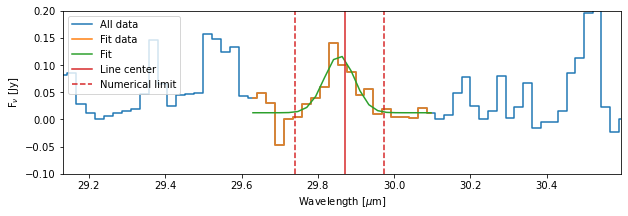

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,3.504442e-17,3.473214e-17,6.824397e-18,924.505117,184.433178,62.22536,70.431276,0.01231,0.006622


In [18]:
#FZ Tau

irs=read_irs('FZTAU',dd='/Users/dougcobb/URSI_2022/REDUCED/',noerror=True)
wave_data = pd.DataFrame([29.85], columns=['wave'])
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.20, ymin=-0.1,amp=0.02)
#linefluxes.append(lineflux_data['lineflux'])

lineflux_data

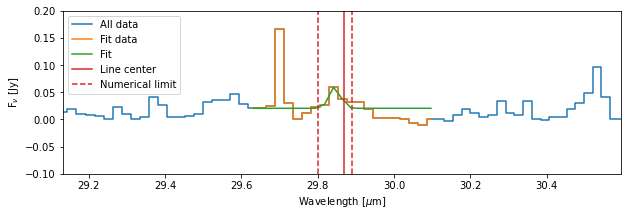

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,5.743879e-18,4.945264e-18,4.353672e-18,348.952264,444.147157,-49.421086,220.480464,0.020523,0.009269


In [19]:
#TW Cha

irs=read_irs('TWCHA',dd='/Users/dougcobb/URSI_2022/REDUCED/',noerror=True)
wave_data = pd.DataFrame([29.85], columns=['wave'])
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.20, ymin=-0.1,amp=0.02)
#linefluxes.append(lineflux_data['lineflux'])

lineflux_data

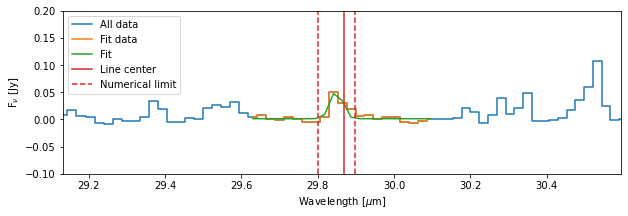

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,7.684449e-18,6.968418e-18,6.919320e-19,376.947903,67.200529,-6.646939,22.802868,0.001385,0.001384


In [20]:
#VZ Cha

irs=read_irs('VZCHA',dd='/Users/dougcobb/URSI_2022/REDUCED/',noerror=True)
wave_data = pd.DataFrame([29.85], columns=['wave'])
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.20, ymin=-0.1,amp=0.02)
#linefluxes.append(lineflux_data['lineflux'])

lineflux_data

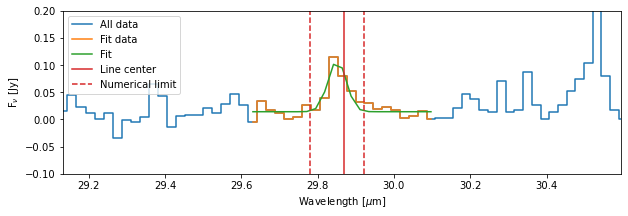

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,1.965451e-17,1.887870e-17,2.305285e-18,561.883299,84.739307,11.085923,34.182195,0.014204,0.003242


In [22]:
#GQ Lup

irs=read_irs('GQLUP',dd='/Users/dougcobb/URSI_2022/REDUCED/',noerror=True)
wave_data = pd.DataFrame([29.85], columns=['wave'])
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.20, ymin=-0.1,amp=0.02)
#linefluxes.append(lineflux_data['lineflux'])

lineflux_data

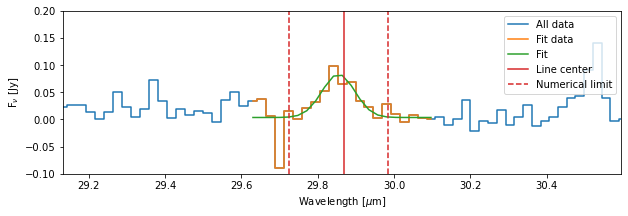

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,3.027960e-17,2.887574e-17,8.845193e-18,1017.77147,307.3781,40.54367,115.205291,0.003605,0.008102


In [23]:
#IRAS 04385

irs=read_irs('04385+2550',dd='/Users/dougcobb/URSI_2022/REDUCED/',noerror=True)
wave_data = pd.DataFrame([29.85], columns=['wave'])
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.20, ymin=-0.1,amp=0.02)
#linefluxes.append(lineflux_data['lineflux'])

lineflux_data

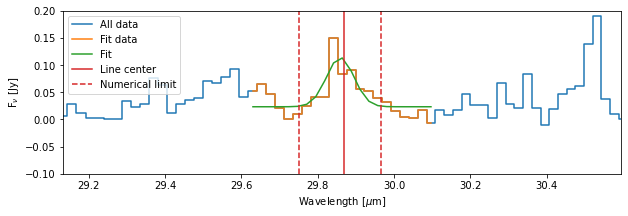

Is this fit okay? [y or n]
Is this fit okay? Please enter y or n.y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,2.890336e-17,2.743434e-17,6.655442e-18,848.53515,215.285738,91.530491,83.268806,0.023346,0.006835


In [24]:
#GK Tau

irs=read_irs('GKTAU',dd='/Users/dougcobb/URSI_2022/REDUCED/',noerror=True)
wave_data = pd.DataFrame([29.85], columns=['wave'])
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.20, ymin=-0.1,amp=0.02)
#linefluxes.append(lineflux_data['lineflux'])

lineflux_data

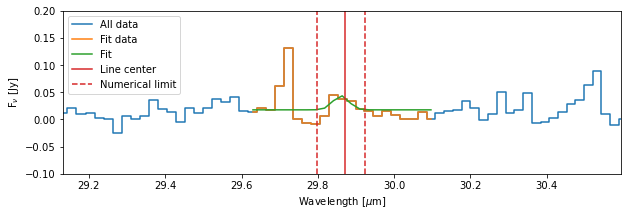

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,4.078863e-18,4.553053e-18,5.138707e-18,489.476786,708.621007,103.944896,294.795017,0.017659,0.008109


In [25]:
#CI Tau

irs=read_irs('CITAU',dd='/Users/dougcobb/URSI_2022/REDUCED/',noerror=True)
wave_data = pd.DataFrame([29.85], columns=['wave'])
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.20, ymin=-0.1,amp=0.02)
#linefluxes.append(lineflux_data['lineflux'])

lineflux_data

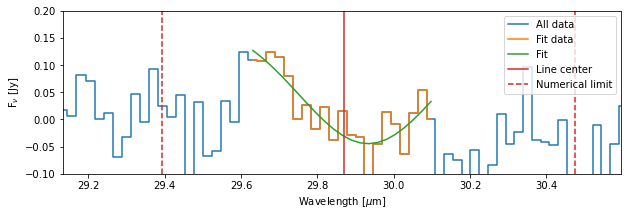

Is this fit okay? [y or n]y


,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,29.85,-2.742176e-16,3.444151e-16,4.891284e-17,4254.839654,1829.941697,831.808382,159.974273,0.183023,0.116499


In [26]:
#RY Lup

irs=read_irs('RYLUP',dd='/Users/dougcobb/URSI_2022/REDUCED/',noerror=True)
wave_data = pd.DataFrame([29.85], columns=['wave'])
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.20, ymin=-0.1,amp=0.02)
#linefluxes.append(lineflux_data['lineflux'])

lineflux_data

In [27]:
#IQ Tau

irs=read_irs('IQTAU',dd='/Users/dougcobb/URSI_2022/REDUCED/',noerror=True)
wave_data = pd.DataFrame([29.85], columns=['wave'])
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.20, ymin=-0.1,amp=0.02)
#linefluxes.append(lineflux_data['lineflux'])

lineflux_data

ValueError: operands could not be broadcast together with shapes (878,) (879,) 